In [ ]:
# K-Means Clustering

In [2]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

students_data = pd.read_csv(r"C:\Pratham\programmingProjects\pythonProgrammes\Python-code-practice\GitHub_SRM\ClusteringProject\StudentsPerformance.csv")
students_data.head()

,gender,race/ethnicity,math score,reading score,writing score
0,female,group B,72,72,74
1,female,group C,69,90,88
2,female,group B,90,95,93
3,male,group A,47,57,44
4,male,group C,76,78,75


,gender,race/ethnicity,math score,reading score,writing score,Cluster
0,female,group B,72,72,74,0
1,female,group C,69,90,88,0
2,female,group B,90,95,93,3
3,male,group A,47,57,44,1
4,male,group C,76,78,75,0


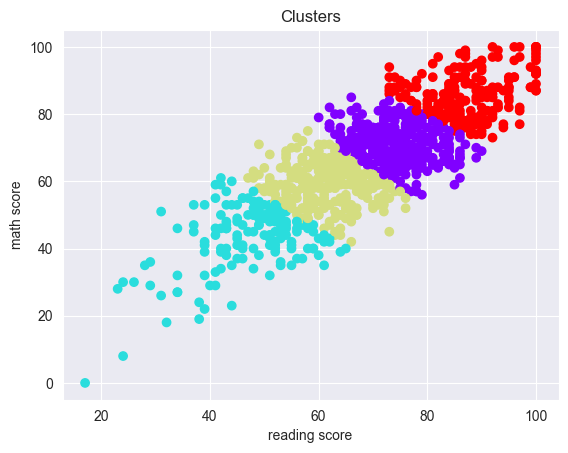

In [4]:
#Number of clusters set for 4
kmeans = KMeans(4)

#Clustering based on reading and math scores
kmeans.fit(students_data.loc[:,["reading score", "math score"]]) #loc[rows,columns]
identified_clusters = kmeans.fit_predict(students_data.loc[:,["reading score", "math score"]]) 

#Adding a column to the dataset with cluster fit 
data_with_clusters = students_data.copy()
data_with_clusters["Cluster"] = identified_clusters 
display(data_with_clusters.head())

plt.scatter(data_with_clusters["reading score"], data_with_clusters["math score"], 
            c = data_with_clusters["Cluster"], cmap = "rainbow")
plt.title("Clusters")
plt.xlabel("reading score")
plt.ylabel("math score")
plt.show()  

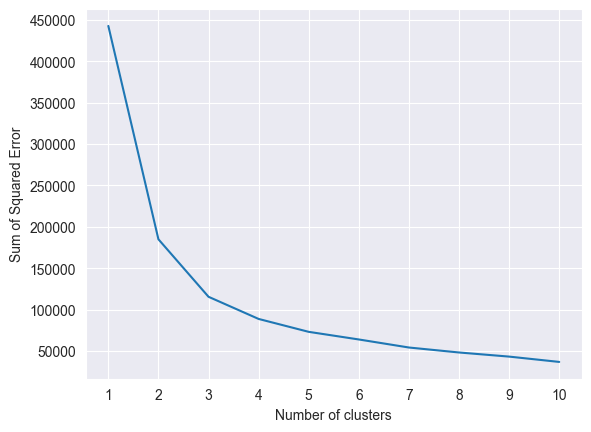

In [5]:
#Trying out different numbers as the number of clusters 
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(students_data.loc[:,["reading score", "math score"]])
    #Computing the sum of squared error for each
    sse.append(kmeans.inertia_)


plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squared Error")
plt.show()

In [6]:
good_performance = data_with_clusters[data_with_clusters["Cluster"] == 0] #it will return that row which have cluster as 0
poor_performance = data_with_clusters[data_with_clusters["Cluster"] == 1] #it will return that row which have cluster as 1
excellent_performance = data_with_clusters[data_with_clusters["Cluster"] == 2] #it will return that row which have cluster as 2

There are high number of student whose performance is excellent


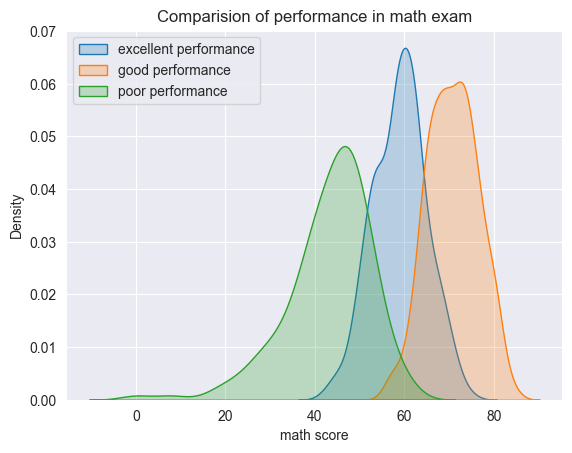

In [7]:
sns.kdeplot(data=excellent_performance['math score'], label="excellent performance", fill=True)
sns.kdeplot(data=good_performance['math score'], label="good performance", fill=True)
sns.kdeplot(data=poor_performance['math score'], label="poor performance", fill=True)
plt.title("Comparision of performance in math exam")
plt.legend(loc = "upper left")
print("There are high number of student whose performance is excellent")


There are high number of student whose performance is excellent


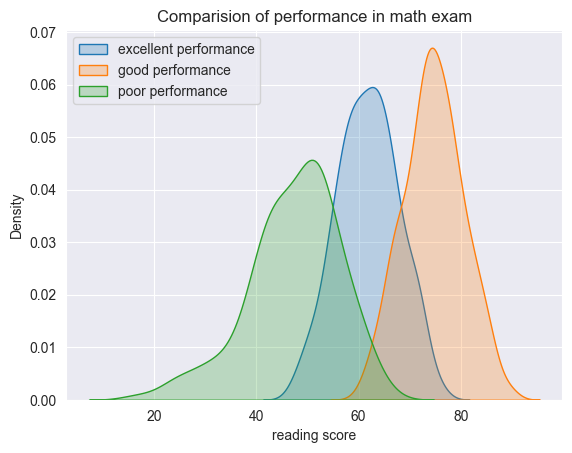

In [8]:
sns.kdeplot(data=excellent_performance['reading score'], label="excellent performance", fill=True)
sns.kdeplot(data=good_performance['reading score'], label="good performance", fill=True)
sns.kdeplot(data=poor_performance['reading score'], label="poor performance", fill=True)
plt.title("Comparision of performance in math exam")
plt.legend(loc = "upper left")
print("There are high number of student whose performance is excellent")

There are high number of student whose performance is excellent


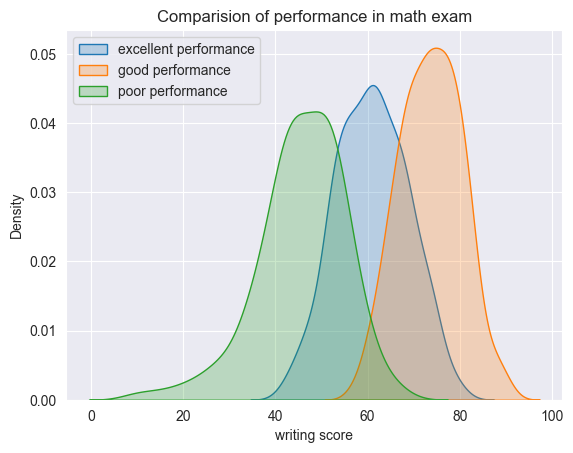

In [9]:
sns.kdeplot(data=excellent_performance['writing score'], label="excellent performance", fill=True)
sns.kdeplot(data=good_performance['writing score'], label="good performance", fill=True)
sns.kdeplot(data=poor_performance['writing score'], label="poor performance", fill=True)
plt.title("Comparision of performance in math exam")
plt.legend(loc = "upper left")
print("There are high number of student whose performance is excellent")